In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
series0 = pd.read_csv('./results/series0.csv')
series1 = pd.read_csv('./results/series1.csv')
series2 = pd.read_csv('./results/series2.csv')
series3 = pd.read_csv('./results/series3.csv')
series4 = pd.read_csv('./results/series4.csv')
series5 = pd.read_csv('./results/series5.csv')
series6 = pd.read_csv('./results/series6.csv')
series7 = pd.read_csv('./results/series7.csv')
series8 = pd.read_csv('./results/series8.csv')
series9 = pd.read_csv('./results/series9.csv')

In [3]:
series0['s'] = 0
series1['s'] = 1
series2['s'] = 2
series3['s'] = 3
series4['s'] = 4
series5['s'] = 5
series6['s'] = 6
series7['s'] = 7
series8['s'] = 8
series9['s'] = 9

In [4]:
df = pd.concat([series0,series1,series2,series3,series4,series5,series6,series7,series8,series9], ignore_index=True)
df['cpu_time'] = df['user'] + df['sys']

In [5]:
df

,result,user,sys,s,cpu_time
0,405,9.76,0.03,0,9.79
1,393,7.40,0.02,0,7.42
2,398,7.52,0.01,0,7.53
3,380,8.18,0.01,0,8.19
4,419,6.74,0.02,0,6.76
...,...,...,...,...,...
95,398,8.28,0.01,9,8.29
96,358,10.54,0.01,9,10.55
97,449,6.42,0.01,9,6.43
98,384,8.46,0.01,9,8.47


In [6]:
value_diff = []
value_max = []
max_time = []
for i in range(10):
    value_max.append(df[df['s'] == i]['result'].max())
    value_diff.append(df[df['s'] == i].max()['result'] - df[df['s'] == i].min()['result'])
    max_time.append(df[df['s'] == i].max()['cpu_time'])
    
d = {"value_diff" : value_diff, "value_max" : value_max, "max_time" : max_time}
res = pd.DataFrame(d)

In [7]:
res

,value_diff,value_max,max_time
0,48.0,419,13.73
1,38.0,415,15.86
2,55.0,426,14.75
3,62.0,437,14.08
4,34.0,403,13.29
5,78.0,451,14.18
6,82.0,453,10.19
7,47.0,422,17.64
8,69.0,430,10.40
9,91.0,449,14.71


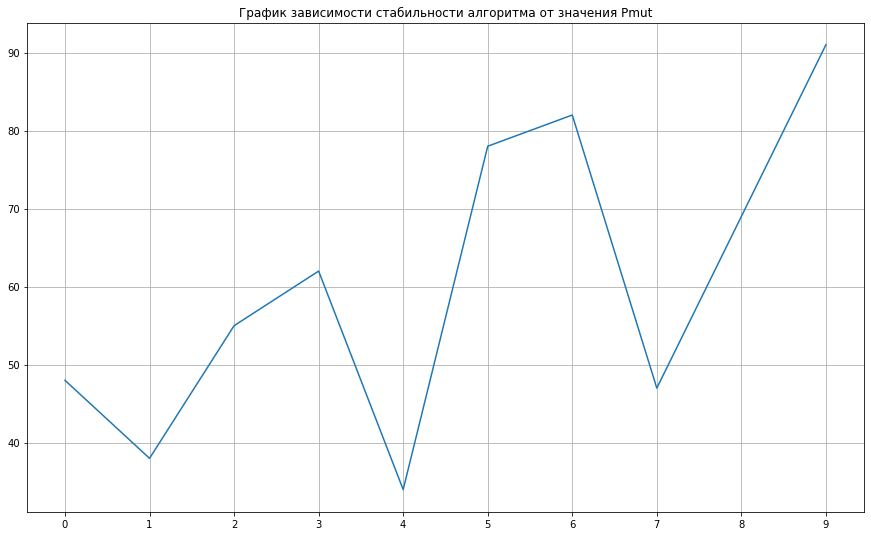

In [8]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости стабильности алгоритма от значения Pmut")
plt.plot(list(res.index), list(res.value_diff))
plt.xticks(list(res.index))

plt.grid()
plt.show()

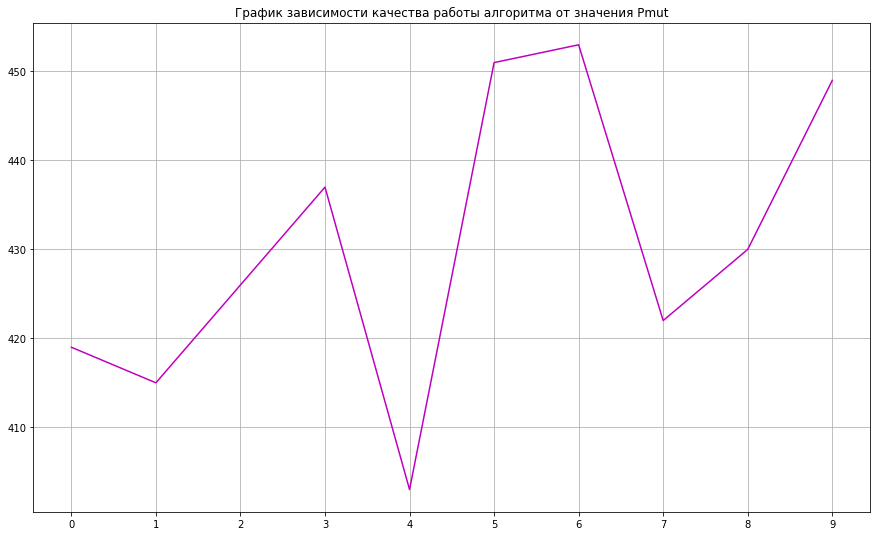

In [9]:
plt.figure(figsize=(15, 9))
plt.title("График зависимости качества работы алгоритма от значения Pmut")
plt.plot(list(res.index), list(res.value_max), 'm')
plt.xticks(list(res.index))
plt.grid()
plt.show()

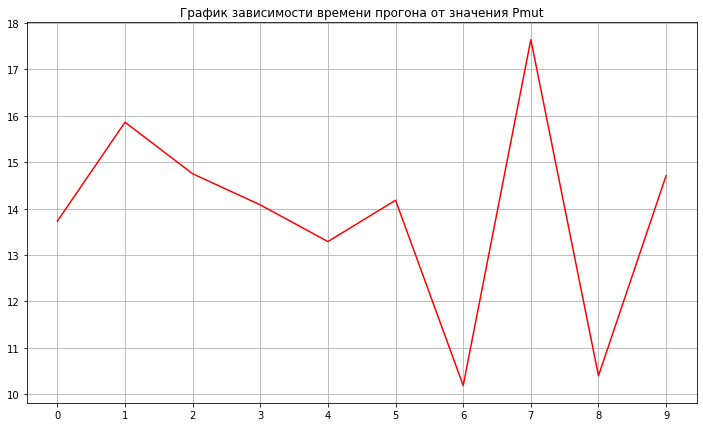

In [10]:
plt.figure(figsize=(12, 7))
plt.title("График зависимости времени прогона от значения Pmut")
plt.plot(list(res.index), list(res.max_time), 'r')
plt.xticks(list(res.index))
plt.grid()
plt.show()